In [2]:
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer
import torch

In [3]:
model_name = "bert-large-uncased-whole-word-masking-finetuned-squad"

In [4]:
model = BertForQuestionAnswering.from_pretrained(model_name)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/391 [00:00<?, ?it/s]

BertForQuestionAnswering LOAD REPORT from: bert-large-uncased-whole-word-masking-finetuned-squad
Key                      | Status     |  | 
-------------------------+------------+--+-
bert.pooler.dense.bias   | UNEXPECTED |  | 
bert.pooler.dense.weight | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [5]:
tokenizer = BertTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [6]:
question = "When was first dvd released?"
answer = "The first DVD (Digital Versatile Disc) was released on March 24, 1997. It was a movie titled 'Twister' and was released in Japan. DVDs quickly gained popularity as a replacement for VHS tapes and became a common format for storing and distributing digital video and data.Sunset Motors is a renowned automobile dealership that has been a cornerstone of the automotive industry since its establishment in 1978. Located in the picturesque town of Crestwood, nestled in the heart of California's scenic Central Valley, Sunset Motors has built a reputation for excellence, reliability, and customer satisfaction over the past four decades. Founded by visionary entrepreneur Robert Anderson, Sunset Motors began as a humble, family-owned business with a small lot of used cars. However, under Anderson's leadership and commitment to quality, it quickly evolved into a thriving dealership offering a wide range of vehicles from various manufacturers. Today, the dealership spans over 10 acres, showcasing a vast inventory of new and pre-owned cars, trucks, SUVs, and luxury vehicles. One of Sunset Motors' standout features is its dedication to sustainability. In 2010, the dealership made a landmark decision to incorporate environmentally friendly practices, including solar panels to power the facility, energy-efficient lighting, and a comprehensive recycling program. This commitment to eco-consciousness has earned Sunset Motors recognition as an industry leader in sustainable automotive retail. Sunset Motors proudly offers a diverse range of vehicles, including popular brands like Ford, Toyota, Honda, Chevrolet, and BMW, catering to a wide spectrum of tastes and preferences. In addition to its outstanding vehicle selection, Sunset Motors offers flexible financing options, allowing customers to secure affordable loans and leases with competitive interest rates."

In [14]:
encoding = tokenizer.__call__(text=question,text_pair=answer)

In [15]:
print(encoding)

{'input_ids': [101, 2043, 2001, 2034, 4966, 2207, 1029, 102, 1996, 2034, 4966, 1006, 3617, 22979, 5860, 1007, 2001, 2207, 2006, 2233, 2484, 1010, 2722, 1012, 2009, 2001, 1037, 3185, 4159, 1005, 9792, 2121, 1005, 1998, 2001, 2207, 1999, 2900, 1012, 22477, 2855, 4227, 6217, 2004, 1037, 6110, 2005, 17550, 13324, 1998, 2150, 1037, 2691, 4289, 2005, 23977, 1998, 20083, 3617, 2678, 1998, 2951, 1012, 10434, 9693, 2003, 1037, 8228, 9935, 16743, 5605, 2008, 2038, 2042, 1037, 23354, 1997, 1996, 12945, 3068, 2144, 2049, 5069, 1999, 3301, 1012, 2284, 1999, 1996, 23273, 2237, 1997, 11146, 3702, 1010, 22704, 1999, 1996, 2540, 1997, 2662, 1005, 1055, 12916, 2430, 3028, 1010, 10434, 9693, 2038, 2328, 1037, 5891, 2005, 8012, 1010, 15258, 1010, 1998, 8013, 9967, 2058, 1996, 2627, 2176, 5109, 1012, 2631, 2011, 28036, 10670, 2728, 5143, 1010, 10434, 9693, 2211, 2004, 1037, 15716, 1010, 2155, 1011, 3079, 2449, 2007, 1037, 2235, 2843, 1997, 2109, 3765, 1012, 2174, 1010, 2104, 5143, 1005, 1055, 4105, 1998, 8

In [16]:
inputs = encoding['input_ids']
sentence_embeddings = encoding['token_type_ids']
tokens = tokenizer.convert_ids_to_tokens(inputs)

In [17]:
tokenizer.decode(101)

'[CLS]'

In [18]:
output = model(input_ids = torch.tensor([inputs]),token_type_ids=torch.tensor([sentence_embeddings]))

In [19]:
start_index  = torch.argmax(output.start_logits)
end_index  = torch.argmax(output.end_logits)

In [20]:
print(start_index)
print(end_index)

tensor(19)
tensor(22)


In [21]:
ans = ' '.join(tokens[start_index:end_index+1])
print(ans)

march 24 , 1997


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
s_scores = output.start_logits.detach().numpy().flatten()
e_scores = output.end_logits.detach().numpy().flatten()

In [24]:
token_labels = []
for (i,token) in enumerate(tokens):
  token_labels.append('{:} - {:>2}'.format(token,i))

/tmp/ipython-input-387/1827373224.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="center")


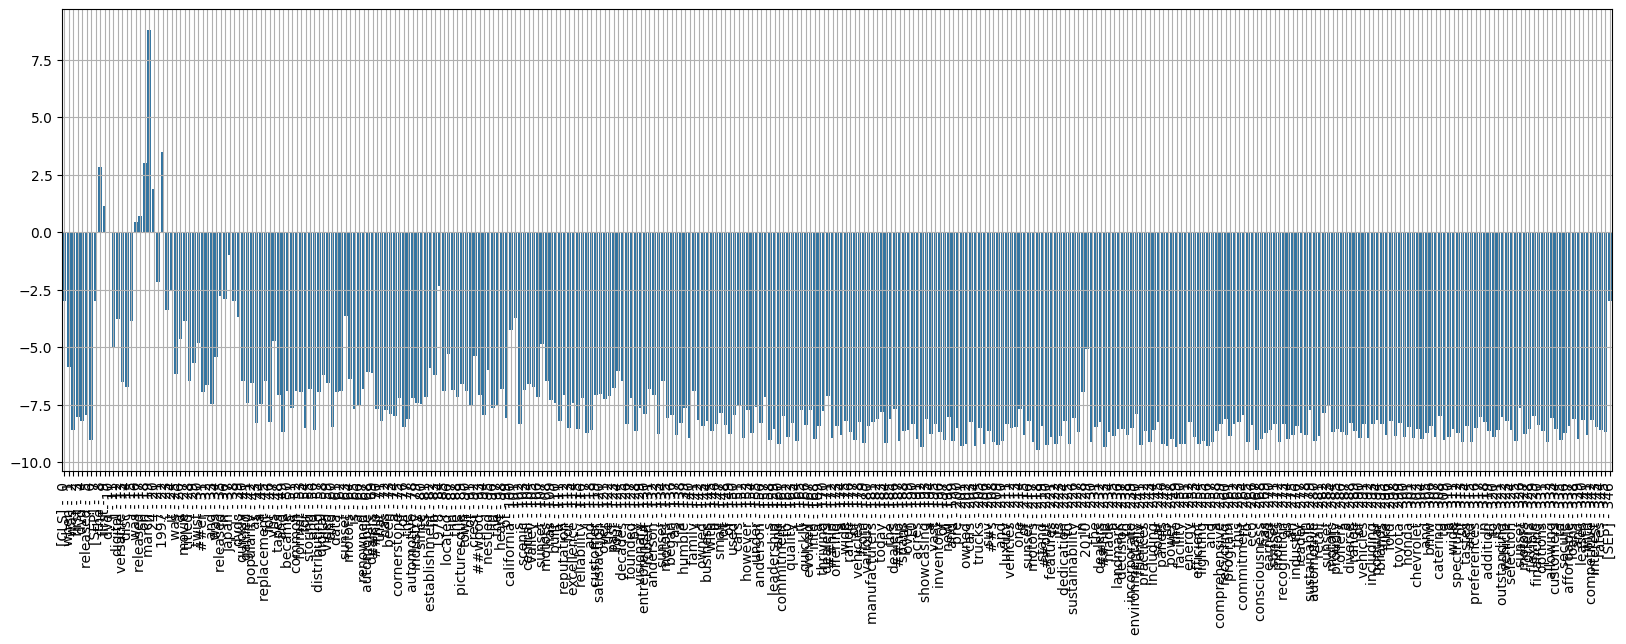

In [28]:
fig,axis = plt.subplots(figsize=(20, 6))
ax = sns.barplot(x=token_labels,y=s_scores,ax=axis)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="center")
ax.grid(True)

/tmp/ipython-input-387/4190407441.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="center")


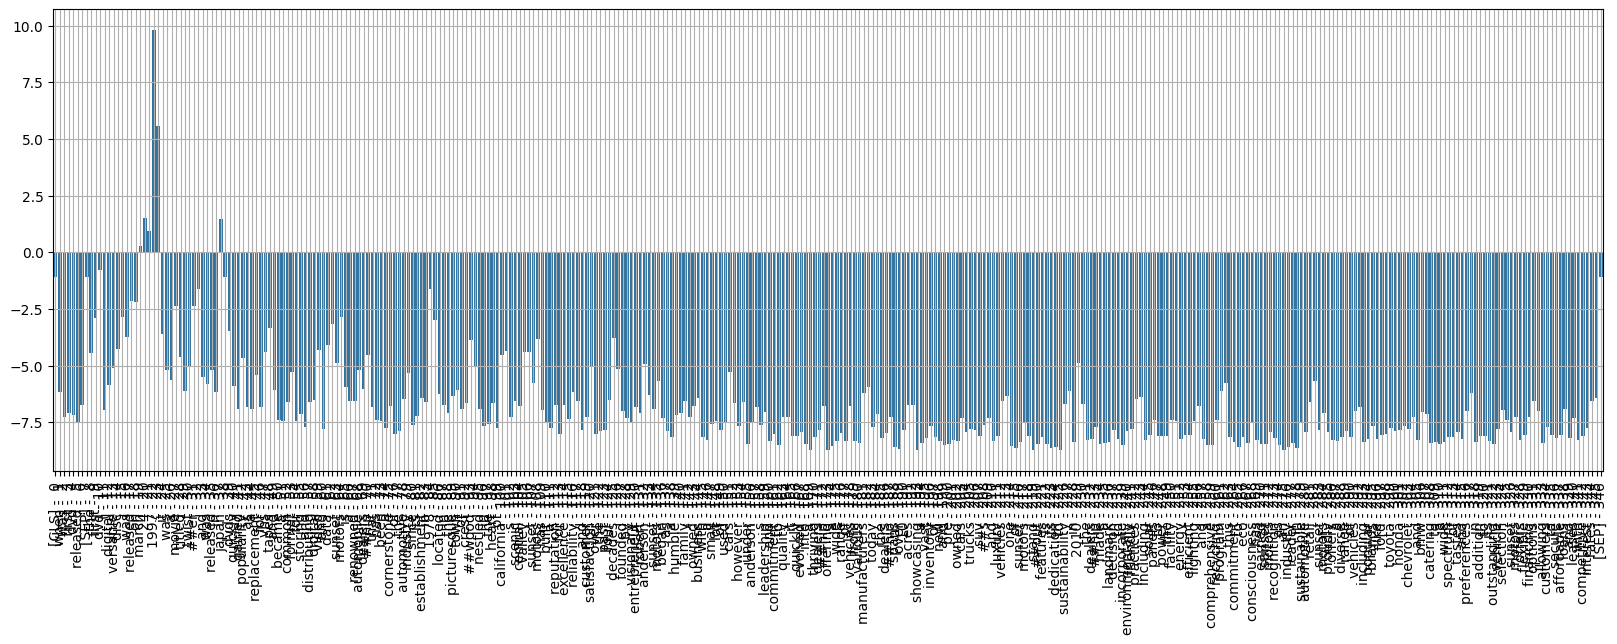

In [29]:
fig,axis = plt.subplots(figsize=(20, 6))
ax = sns.barplot(x=token_labels,y=e_scores,ax=axis)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="center")
ax.grid(True)